In [105]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
def add_intersectional_subgroup_columns(df, subgroups_a, subgroups_b):
  """Adds a boolean column for each pair of subgroups to the data frame.

    New column contains True if the text contains both subgroup terms.
    """
  intersectional_terms = []
  for term_a in subgroups_a:
    for term_b in subgroups_b:
      i_term = "%s %s" % (term_a, term_b)
      intersectional_terms.append(i_term)
      df[i_term] = df[term_a] & df[term_b]
  return intersectional_terms


In [107]:
models = ['TOXICITY@' + str(i) for i in range(1, 7)]
madlibs = pd.read_csv('model_card/intersectional_madlibs_scored.csv')

madlibs['label_bool'] = madlibs.apply(lambda row: row.toxicity == 'toxic', axis=1)

# Add columns for each subgroup.
madlibs_words = pd.read_csv('new_madlibber/input_data/English/words.csv')
terms = madlibs_words[madlibs_words.type=='identity'].word.tolist()
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'phrase', terms)

In [108]:
#subset_unitary_gender_orientation_terms = [
#    'lesbian',
#    'gay',
#    'queer',
#    'straight',
#    'bisexual',
#    'homosexual',
#    'heterosexual',
#    'cis',
#    'trans',
#    'nonbinary']
#subset_unitary_race_terms = [
#    'black',
#    'white']
#unitary_terms = unitary_gender_orientation_terms + unitary_race_terms

unitary_sexuality_terms = madlibs_words[madlibs_words.type=='identity'][madlibs_words.subtype=='sexuality'].word.tolist()
unitary_gender_terms = madlibs_words[madlibs_words.type=='identity'][madlibs_words.subtype=='gender'].word.tolist()
unitary_ethnicity_terms = madlibs_words[madlibs_words.type=='identity'][madlibs_words.subtype=='ethnicity'].word.tolist()

unitary_terms = terms

intersectional_terms = add_intersectional_subgroup_columns(madlibs, unitary_ethnicity_terms, unitary_gender_terms + unitary_sexuality_terms)

/usr/local/google/home/lucyvasserman/venv2/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/google/home/lucyvasserman/venv2/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/google/home/lucyvasserman/venv2/lib/python2.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [109]:
unitary_madlibs_results = model_bias_analysis.compute_bias_metrics_for_models(madlibs, unitary_terms, models, 'label_bool')

In [110]:
intersectional_madlibs_results = model_bias_analysis.compute_bias_metrics_for_models(madlibs, intersectional_terms, models, 'label_bool')

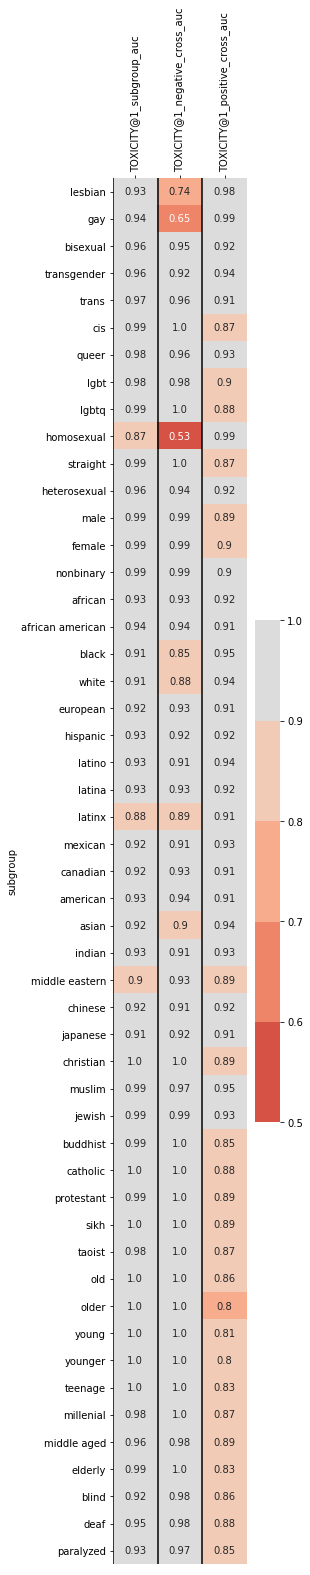

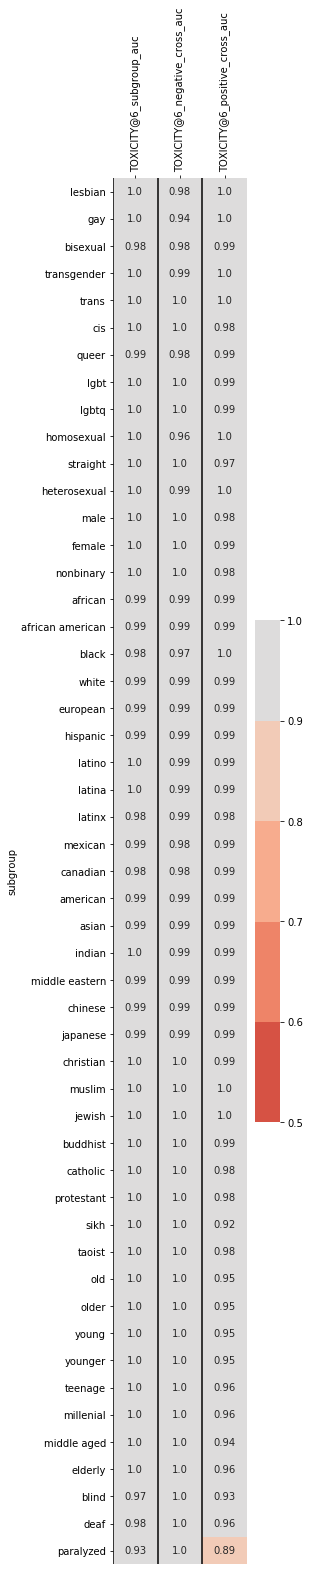

In [ ]:
model_bias_analysis.plot_auc_heatmap(unitary_madlibs_results, ['TOXICITY@1'])
model_bias_analysis.plot_auc_heatmap(unitary_madlibs_results, ['TOXICITY@6'])

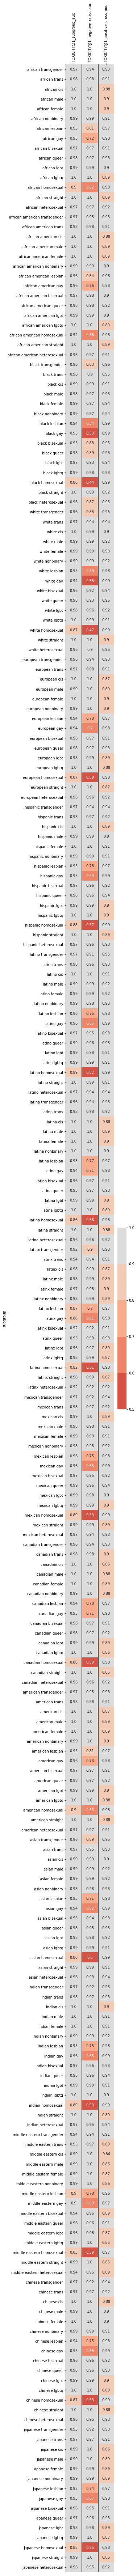

In [ ]:
model_bias_analysis.plot_auc_heatmap(intersectional_madlibs_results, ['TOXICITY@1'])
model_bias_analysis.plot_auc_heatmap(intersectional_madlibs_results, ['TOXICITY@6'])

In [ ]:
relevant_columns = ['subgroup']
for m in models:
    relevant_columns += [m + metric for metric in ['_subgroup_auc', '_negative_cross_auc', '_positive_cross_auc']]

In [ ]:
unitary_madlibs_results.to_csv('model_card/unitary_results.csv', columns=relevant_columns)

In [ ]:
intersectional_madlibs_results.to_csv('model_card/intersectional_results.csv', columns=relevant_columns)